## Goal
In this notebook, I am going to demostrate why there's usually more information in the data about the noise than there is about the signal.

For simplicity, I assume a gaussian model, draw 100 samples from it and calculate the posterior. 
Then, I calculate the information gain for mean and standard deviation. 

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev
import sys
%matplotlib inline

gaussian posterior is defined as 

$$
\begin{equation}
p(\mu,\sigma | data)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(data-\mu)^2}{2\sigma^2}}
\end{equation}
$$

In [73]:
def L(datas, mu, sigma):
    result=1
    for data in datas:
        result *= 1./(np.sqrt(2*np.pi*sigma**2))*np.exp(-(data-mu)**2/(2*sigma**2))
    return result

draw samples 

In [74]:
mu, sigma = 1, 4 # mean and standard deviation
datas = np.random.normal(mu, sigma, 100)

sample the posterior

In [75]:
sigmas = np.linspace(1, 7, 70)
mus = np.linspace(-1, 5, 70)
Likelihoods=np.zeros((70,70))
for xx, sigma in enumerate(sigmas):
    print(xx),
    for yy, mu in enumerate(mus):
        Likelihoods[yy,xx]=L(datas, mu,sigma)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69


/Users/chto/workspaces/env1/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


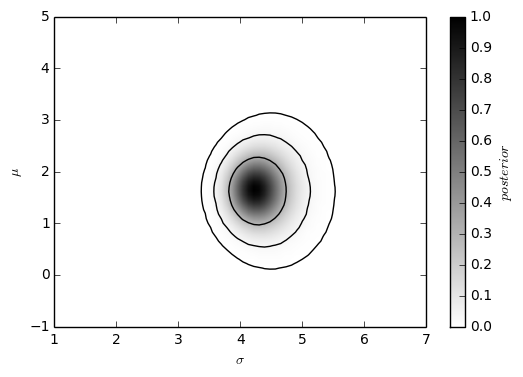

In [78]:
Likelihoods /= np.max(Likelihoods)
plt.imshow(Likelihoods, origin='lower',
           extent=(sigmas[0], sigmas[-1], mus[0], mus[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$posterior$')
plt.contour(sigmas,mus, convert_to_stdev(np.log(Likelihoods)),
            levels=(0.683, 0.955, 0.997),
            colors='k')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')

posterior for $\mu$ and $\sigma$ by marginalizing over all other parameters.

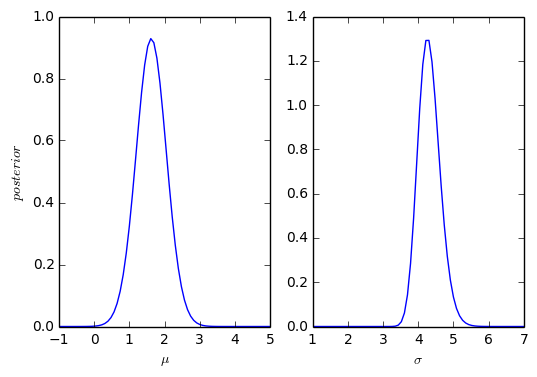

In [80]:
p_mu=np.sum(Likelihoods, axis=1)
p_mu.shape
p_mu /= np.sum(p_mu)*(mus[1]-mus[0])
p_sigma=np.sum(Likelihoods, axis=0)
p_sigma /= np.sum(p_sigma)*(sigmas[1]-sigmas[0])
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.set_xlabel("$\mu$")
ax1.set_ylabel("$posterior$")
ax1.plot(mus, p_mu)
ax1=fig.add_subplot(122)
ax1.set_xlabel("$\sigma$")
ax1.plot(sigmas, p_sigma)

The information gain (Kullback-Leibler divergence)is defined as 
$$
\begin{equation}
gain = \sum_{i} log(\frac{posterior_i}{prior_i}) \times posterior_i
\end{equation}
$$, where i runs over whole dataset

In [82]:
print("KL for mu: {0}".format(np.nansum(p_mu*np.log(p_mu))))
print("KL for sigma: {0}".format(np.nansum(p_sigma*np.log(p_sigma))))

KL for mu: -6.68315010818
KL for sigma: -2.79406342725


/Users/chto/workspaces/env1/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/chto/workspaces/env1/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


## Conclusion
1. As you see the information gain for sigma is much greater than mu
2. I am stil not so sure about constraining power. But the posterior for sigma (marginalizing over mu) looks more tight than the posterior for mu (marginalizing over sigma).
3. The result might have some flu